# 03. (실습) IMDB 데이터 + 신경망 모델 만들기

* 어바웃 파이썬 : 딥러닝 with Keras [1, 2]
* 김무성

# Loading the IMDB dataset

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

Using TensorFlow backend.


# Encoding the integer sequences into a binary matrix

In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
          results[i, sequence] = 1.
    return results


In [3]:
x_train = vectorize_sequences(train_data[:1000])
x_test = vectorize_sequences(test_data[:1000])

In [4]:
y_train = np.asarray(train_labels[:1000]).astype('float32')
y_test = np.asarray(test_labels[:1000]).astype('float32')

# Building your network

<img src="figures/ex_nn.png" width=600 />

### The model definition

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Compiling the model

In [6]:
model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

### Setting aside a validation set

In [7]:
x_val = x_train[:200]
partial_x_train = x_train[200:]

In [8]:
y_val = y_train[:200]
partial_y_train = y_train[200:]

### Training your model

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 800 samples, validate on 200 samples
Epoch 1/20
800/800 [==============================] - 1s 642us/step - loss: 0.6888 - acc: 0.5413 - val_loss: 0.6627 - val_acc: 0.7200
Epoch 2/20
800/800 [==============================] - 0s 214us/step - loss: 0.6112 - acc: 0.8463 - val_loss: 0.6318 - val_acc: 0.6700
Epoch 3/20
800/800 [==============================] - 0s 343us/step - loss: 0.5118 - acc: 0.8612 - val_loss: 0.5865 - val_acc: 0.7750
Epoch 4/20
800/800 [==============================] - 0s 440us/step - loss: 0.4447 - acc: 0.9275 - val_loss: 0.5829 - val_acc: 0.7200
Epoch 5/20
800/800 [==============================] - 0s 329us/step - loss: 0.3790 - acc: 0.9538 - val_loss: 0.4955 - val_acc: 0.8400
Epoch 6/20
800/800 [==============================] - 0s 375us/step - loss: 0.3206 - acc: 0.9875 - val_l

In [10]:
history_dict = history.history

In [11]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_acc', 'val_loss'])

# Plotting the training and validation loss

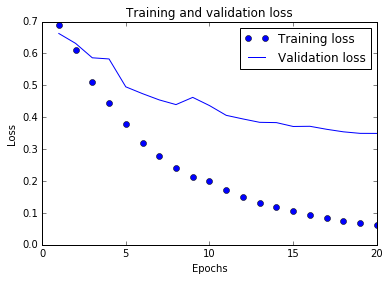

In [13]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Plotting the training and validation accuracy

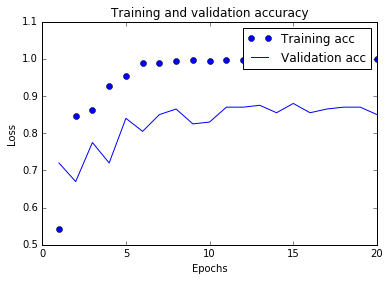

In [15]:
plt.clf() 
acc_values = history_dict['acc'] 
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 참고자료
* [1] Deep Learning with Python - https://www.manning.com/books/deep-learning-with-python
* [2] Jupyter notebooks for the code samples of the book "Deep Learning with Python" - https://github.com/fchollet/deep-learning-with-python-notebooks